# Customer Segmentation by Region and Spending

## Step 1: Import libraries and dataset

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

In [2]:
# Set the visualization style

sns.set_style('whitegrid')

In [3]:
# Define path

path =r'/Users/kevinmcgreen/Documents/InstacartProject'

path = "../02 Data/Prepared Data"

In [13]:
# Load dataset
merged_df = pd.read_csv('/Users/kevinmcgreen/Desktop/Instacart-Data-Insights/02 Data/Prepared Data /ords_prods_cust_together.csv')

In [14]:
# Check out the file

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657347 entries, 0 to 30657346
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0.1            int64  
 1   order_id                int64  
 2   customer_id             int64  
 3   order_number            int64  
 4   order_day_of_week       int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float64
 14  user_order_avg          float64
 15  loyalty_flag            float64
 16  spending_flag           object 
 17  order_frequency_flag    object 
 18  Unnamed: 0              int64  
 19  first_name              object 
 20  surname                 object 
 21  gender                  objec

## Step 2: Hnadle PII(Personally Identifiable Information)

In [15]:
# Remove PII columns

pii_columns = ['first_name', 'surname', 'date_joined']

merged_df.drop(columns= pii_columns, inplace= True)

In [16]:
# Verify pii has been removed

merged_df.columns

Index(['Unnamed: 0.1', 'order_id', 'customer_id', 'order_number',
       'order_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'user_order_avg', 'loyalty_flag',
       'spending_flag', 'order_frequency_flag', 'Unnamed: 0', 'gender',
       'state', 'age', 'num_dependents', 'family_status', 'income'],
      dtype='object')

## Step 3: Regional segmentation

In [ ]:
# Define region mapping 

West = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California',
        'Hawaii', 'Oregon', 'Washington']

Midwest = ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansa', 'Minnesota', 'Missouri', 'Nebraska',
         'North Dakota', 'South Dakota']

South = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia',
         'Texas', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma']

Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']

In [ ]:
# Assign region

def assign_region(state):
    if state in West:
        return 'West'
    elif state in Midwest:
        return 'Midwest'
    elif state in South:
        return 'South'
    elif state in Northeast:
        return 'Northest'

merged_df['region'] = merged_df['state'].apply(assign_region)

In [ ]:
# Check for Distribution

merged_df['region'].value_counts()

region
South       10208094
West         7838932
Midwest      6580217
Northest     5427268
Name: count, dtype: int64

In [ ]:
merged_df

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,num_dependents,family_status,income,region
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
1,2539329,1,1,2,8,-1.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
2,2539329,1,1,2,8,-1.0,12427,3,0,Original Beef Jerky,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
3,2539329,1,1,2,8,-1.0,26088,4,0,Aged White Cheddar Popcorn,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
4,2539329,1,1,2,8,-1.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30657342,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest
30657343,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest
30657344,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest
30657345,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest


## Step 4: Regional spending habits analysis

#### Aggregation by customer sum(orders)

In [ ]:
# Aggregate spending per customer

customer_spending = merged_df.groupby('customer_id').agg({'prices': 'sum', 'state' : 'first'}).reset_index()

In [ ]:
# Define spending flag

threshold = 1000
customer_spending['Spending Level'] = customer_spending['prices'].apply(lambda x: 'High Spender' if x > threshold else 'Low Spender')

In [ ]:
# Group by state and spending level

state_spending = customer_spending.groupby(['state', 'Spending Level']).size().reset_index(name= 'count')

In [ ]:
# Calculate percentage per state

state_totals = state_spending.groupby('state')['count'].transform('sum')
state_spending['percentage'] = (state_spending['count'] / state_totals) * 100

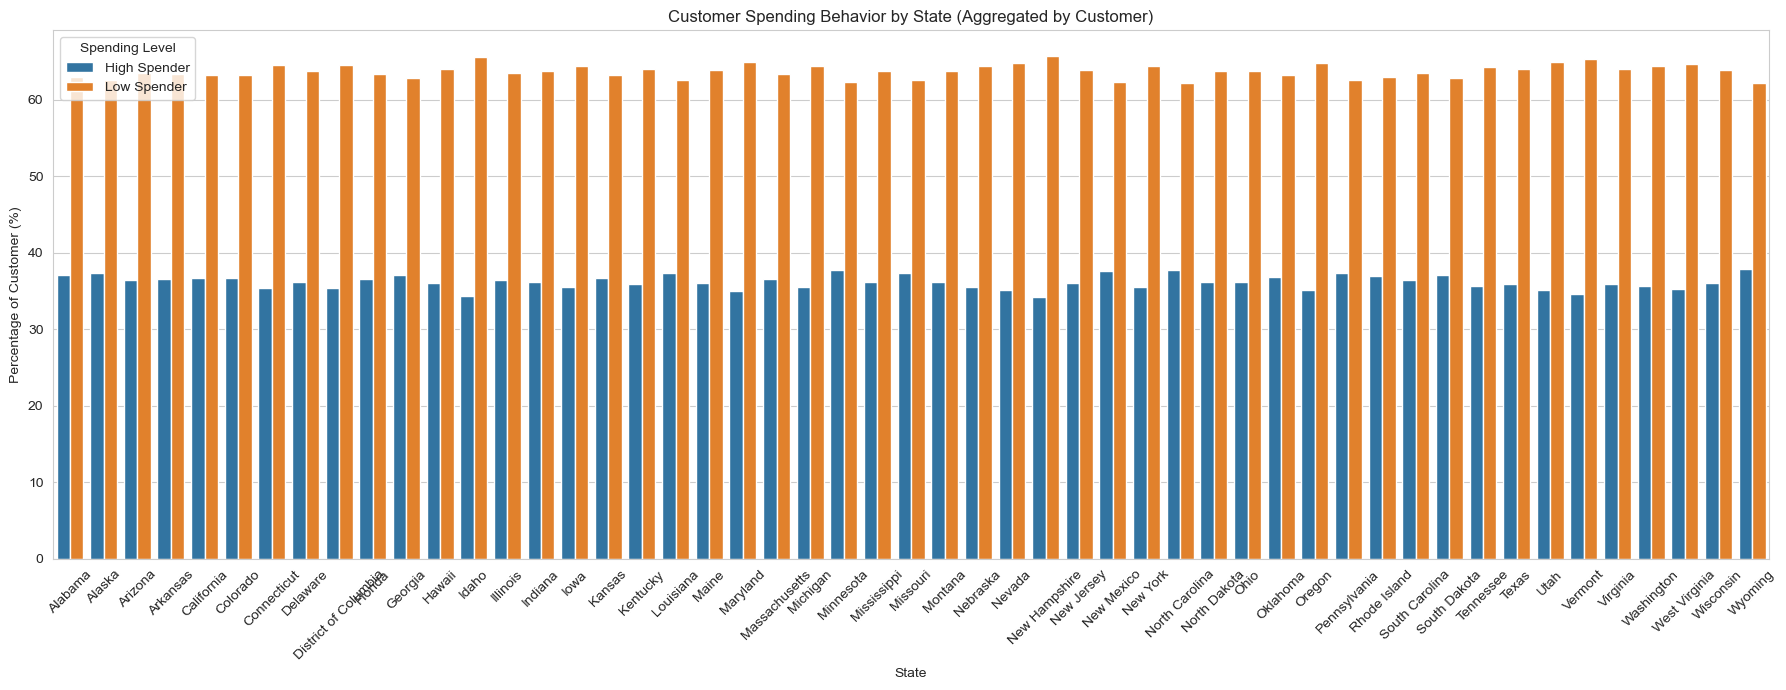

In [ ]:
# The plot

plt.figure(figsize=(18, 7))
sns.barplot(data = state_spending,
            x = 'state', y= 'percentage', hue= 'Spending Level')
plt.title('Customer Spending Behavior by State (Aggregated by Customer)')
plt.ylabel('Percentage of Customer (%)')
plt.xlabel('State')
plt.xticks(rotation= 45)
plt.legend(title= 'Spending Level')
plt.tight_layout()
plt.savefig('Customer_spending_behavior')
plt.show()

## Step 5: Exclude low-activity customers(less than 5 orders)

In [ ]:
# Get customer order count

order_count = merged_df.groupby('customer_id')['order_number'].max()

In [ ]:
# Create a flag

low_activity_customers = order_count[order_count < 5].index
merged_df['activity_flag'] = merged_df['customer_id'].isin(low_activity_customers)

In [ ]:
# Exclude them

df_filtered = merged_df[~merged_df['activity_flag']]

In [ ]:
# Export filtered data

df_filtered.to_pickle('filtered_data')

In [ ]:
df_filtered

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency_flag,gender,state,age,num_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
1,2539329,1,1,2,8,-1.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
2,2539329,1,1,2,8,-1.0,12427,3,0,Original Beef Jerky,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
3,2539329,1,1,2,8,-1.0,26088,4,0,Aged White Cheddar Popcorn,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
4,2539329,1,1,2,8,-1.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30657342,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False
30657343,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False
30657344,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False
30657345,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False


## Step 6: Customer profiling

In [ ]:
# Creat sample profile 

def profile(row) :
    if(
    row['age'] < 25 and 
    row['income'] < 40000 and 
    row['num_dependents'] ==0
    ):
        return 'Student'
        
    elif (
        25 <= row['age'] < 40 and 
        row['department_id'] == 18
    ):
        
        return 'Young Parent'
        
    elif(
        row['income'] > 100000 and
        row['num_dependents'] > 2
    ):
        return 'Affluent Family'

    elif row['order_hour_of_day'] >= 20:
        return 'Night Shopper'

    elif row['order_hour_of_day'] < 6:
        return 'Early Bird'

    else:
        return 'General Shopper'
        

In [ ]:
# Apply profile assignment to each row in the dataframe

merged_df['profile'] = merged_df.apply(profile, axis= 1)

## step 7: Visualize profile distribution 

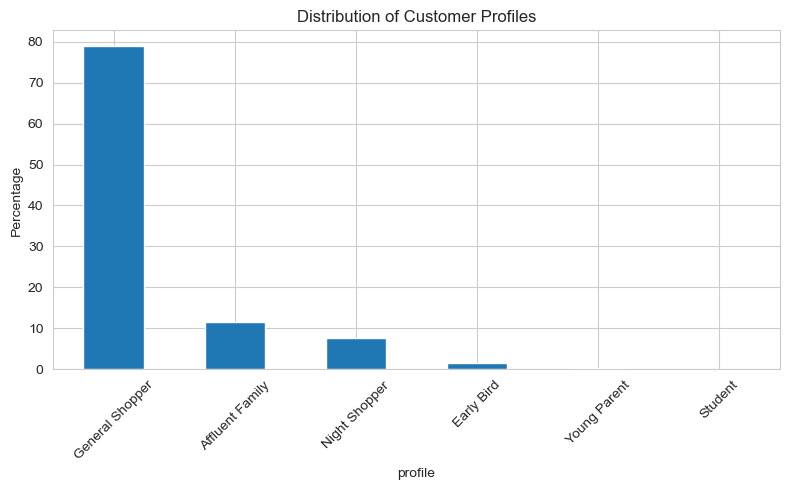

In [ ]:
# Visualization

profile_dist = merged_df['profile'].value_counts(normalize=True) * 100
profile_dist.plot(kind='bar', figsize=(8, 5))
plt.title('Distribution of Customer Profiles')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Profile_Spending')
plt.show()

##### "Note: 'Student' and 'Young Parent' categories show very low representation in the dataset."

## Step 8: Aggregate Metrics by Profile

In [ ]:
# Group by customer profile and agg metrics

agg_profile = merged_df.groupby('profile').agg({'order_number': ['mean', 'max', 'min'],
                                                'prices' : ['mean', 'max', 'min']})


agg_profile.columns = ['_'.join(col).strip() for col in agg_profile.columns.values]
agg_profile.reset_index(inplace= True)

In [ ]:
# Check output

agg_profile.head()

,profile,order_number_mean,order_number_max,order_number_min,prices_mean,prices_max,prices_min
0,Affluent Family,17.179319,99,1,15.941640,99999.0,1.0
1,Early Bird,16.201672,99,1,11.212810,99999.0,1.0
2,General Shopper,17.157665,99,1,11.502141,99999.0,1.0
3,Night Shopper,16.827080,99,1,10.600356,99999.0,1.0
4,Student,15.789622,99,1,6.487231,25.0,1.0


In [ ]:
# Profiles with highest average price

agg_profile.sort_values(by= 'prices_mean', ascending= False, inplace= True)

/var/folders/c3/vmr1w1q937z6kp6c42j805100000gn/T/ipykernel_36551/1245829060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= agg_profile, x='profile', y='prices_mean', palette= 'viridis')


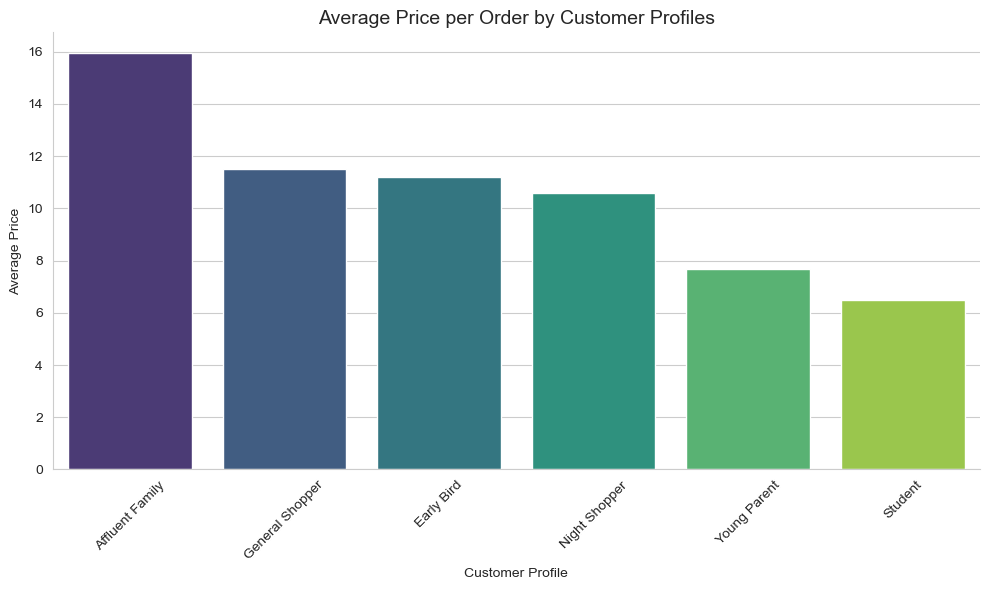

In [ ]:
# Visualize

plt.figure(figsize=(10, 6))
sns.barplot(data= agg_profile, x='profile', y='prices_mean', palette= 'viridis')

plt.title('Average Price per Order by Customer Profiles', fontsize= 14)
plt.ylabel('Average Price')
plt.xlabel('Customer Profile')
plt.xticks(rotation= 45)
sns.despine()
plt.savefig('Aggegation Metrics')
plt.tight_layout()
plt.show()


## Step 9: Linking profiles with regions and departments 

In [ ]:
# Creating crosstab

cross_region = pd.crosstab(merged_df['profile'],merged_df['region'], normalize= 'index') * 100
cross_department = pd.crosstab(merged_df['profile'], merged_df['department_id'], normalize= 'index') * 100

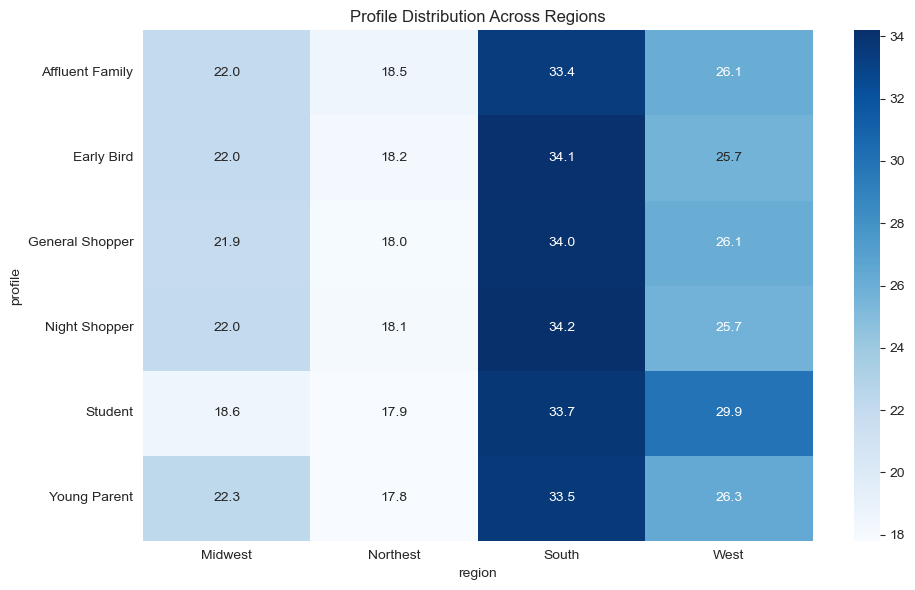

In [ ]:
# Visualize results across regions

plt.figure(figsize=(10, 6))
sns.heatmap(cross_region, annot= True, cmap= 'Blues', fmt= ".1f")
plt.title("Profile Distribution Across Regions")
plt.tight_layout()
plt.savefig("Profile Distribution Across Regions")
plt.show()

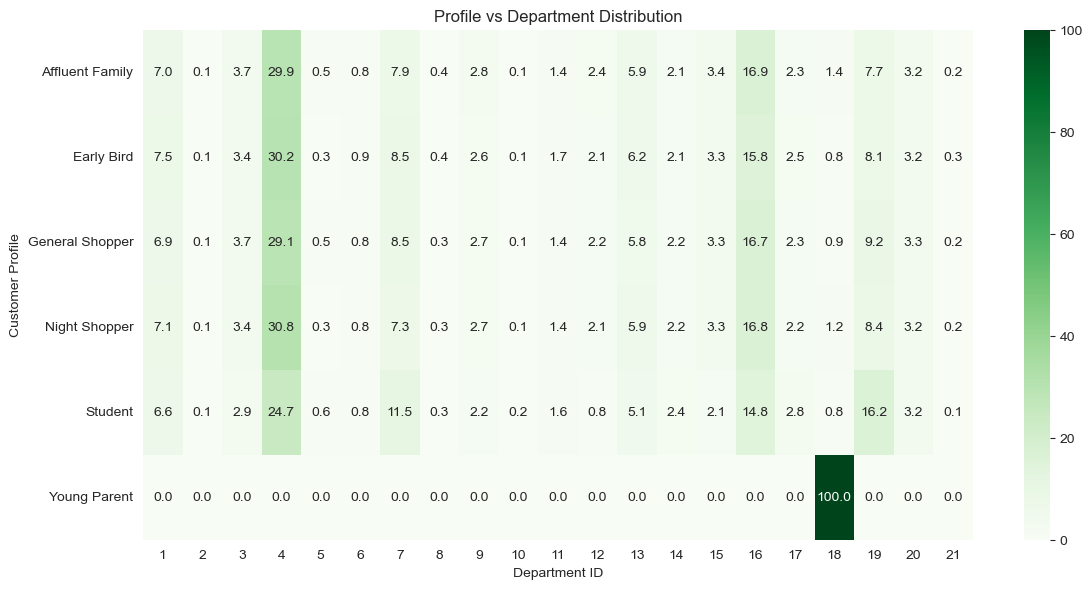

In [ ]:
# Visualize results of profile vs distribution 

plt.figure(figsize=(12, 6))
sns.heatmap(cross_department, annot = True, cmap = 'Greens',fmt= ".1f")
plt.title("Profile vs Department Distribution")
plt.xlabel("Department ID")
plt.ylabel("Customer Profile")
plt.tight_layout()
plt.savefig('Profile vs Department Distribution')
plt.show()

#### Interpretation note

* Affluent Families and Early Birds tend to shop more broadly across several departments.
* Students and Young Parents exhibit lower engagement across departments, which may reflect limited purchasing power or narrower shopping needs.
* Young Parents show a very strong preference for Department 18, suggesting this may correspond to baby products or parenting related items, this department dominates their purchase behavior, with limited activity elsewhere.
* Students also show concentrated but lower frequency purchases, with mild engagement in departments like 4 and 7, likely representing budget-friendly or convenience-based products.
* Affluent Families, Early Birds, and General Shoppers display a more diversified shopping pattern, engaging across multiple departments, though still with varying intensity.
* Night Shoppers exhibit behavior similar to General Shoppers but with slightly more focus on fewer departments, possibly reflecting time constrained or habitual shopping.

In [ ]:
# Export final dataset

merged_df.to_pickle('final_instacart_data.pkl')
merged_df.to_csv('final_instacart_data.csv', index= False)